In [4]:
from preprocessing_step import *
from prediction_step import *
from validation_step import *

## Load Data

### Load data from google sheet from google colab

In [2]:
#Import data from google sheet

# 1. Authorizing
from google.colab import auth
auth.authenticate_user()

# 2. Credentials
import gspread
from google.auth import default
creds, _ = default()

# 3. Authorizing Credentials
gc = gspread.authorize(creds)

# 4. Importing Google Sheet using google sheet key
docSheet = gc.open_by_key('1sshI9mIlyuSJdbuS4KDXzvLR_K95y-rLaUgTvoHihd0')

ModuleNotFoundError: No module named 'google.colab'

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.DataFrame.from_records(docSheet.sheet1.get_all_values(), )
df

### Load data from excel from local

In [ ]:
# import from file xlsx

import pandas as pd

df = pd.read_excel('data/data_osa.xlsx')
df = df.drop(columns=df.columns[17:26])
df = pd.concat([pd.DataFrame(data=[df.columns.tolist()], columns=df.columns) , df])
df.columns = [i for i in range(0, 17)]
df = df.astype(str)
df = df.replace({"nan": "", "Unnamed: .*": ""}, regex=True)
df


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,No,Jenis Kelamin,Usia (thn),Tinggi (cm),Berat (Kg),Lingkar Perut (cm),Lingkar Leher (cm),Suara Mengorok,Terbangun (berapa kali),,Durasi tidur (jam),Ngantuk saat beraktifitas,Kondisi yang menyertai,,,,Label (OSA)
0,,,,,,,,,buang air kecil,tersedak,,,Diabetes,Hipertensi,Hyperkolesterol,Lainnya,
1,Example,,53.0,164.0,85.0,115.0,41.0,Keras,3,2,5.0,Sedikit Menggangu,True,True,False,,
2,1,Laki-laki,59.0,176.0,110.0,130.0,39.0,Keras,3,5,6.0,Sedikit Menggangu,True,True,True,,Berat
3,2,Perempuan,27.0,154.0,119.0,140.0,45.0,Keras,2,2,6.0,Sedikit Menggangu,True,True,True,,Berat
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,994,,,,,,,,,,,,False,False,False,,
997,995,,,,,,,,,,,,False,False,False,,
998,996,,,,,,,,,,,,False,False,False,,
999,997,,,,,,,,,,,,False,False,False,,


### Load data from google sheet from local

In [5]:
import gspread
from oauth2client.service_account import ServiceAccountCredentials
import pandas as pd

# Define the scope
scope = ["https://spreadsheets.google.com/feeds", "https://www.googleapis.com/auth/drive"]

# Provide the path to the JSON key file of your service account
json_keyfile_path = 'screening-sleep-apnea-463b102abcb8.json'

# Authorize the credentials
credentials = ServiceAccountCredentials.from_json_keyfile_name(json_keyfile_path, scope)
gc = gspread.authorize(credentials)

# Open the Google Sheet using the key
sheet_key = '1sshI9mIlyuSJdbuS4KDXzvLR_K95y-rLaUgTvoHihd0'
docSheet = gc.open_by_key(sheet_key)

# Get all values in the worksheet 1 and Convert to a DataFrame if using pandas
df = pd.DataFrame.from_records(docSheet.sheet1.get_all_values(), )
df


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,No,Jenis Kelamin,Usia (thn),Tinggi (cm),Berat (Kg),Lingkar Perut (cm),Lingkar Leher (cm),Suara Mengorok,Terbangun (berapa kali),,Durasi tidur (jam),Ngantuk saat beraktifitas,Kondisi yang menyertai,,,,Label (OSA)
1,,,,,,,,,buang air kecil,tersedak,,,Diabetes,Hipertensi,Hyperkolesterol,Lainnya,
2,Example,,53,164,85,115,41,Keras,3,2,5,Sedikit Menggangu,TRUE,TRUE,FALSE,,
3,1,Laki-laki,59,176,110,130,39,Keras,3,5,6,Sedikit Menggangu,TRUE,TRUE,TRUE,,Berat
4,2,Perempuan,27,154,119,140,45,Keras,2,2,6,Sedikit Menggangu,TRUE,TRUE,TRUE,,Berat
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
997,994,,,,,,,,,,,,FALSE,FALSE,FALSE,,
998,995,,,,,,,,,,,,FALSE,FALSE,FALSE,,
999,996,,,,,,,,,,,,FALSE,FALSE,FALSE,,
1000,997,,,,,,,,,,,,FALSE,FALSE,FALSE,,


### Update Columns Name

In [6]:
#get column name

row0 = df.iloc[[0]].values.tolist()[0]
row1 = df.iloc[[1]].values.tolist()[0]

col_name = []
pre = row0[0]

for i in range(df.iloc[[0]].size):

  pre = row0[i] if row0[i] != "" else pre               #update pre if current row0 value not empty
  post = ": " + row1[i] if row1[i] != "" else ""               #update pre if current row0 value not empty

  col_name.append(pre + post)

print(col_name)

['No', 'Jenis Kelamin', 'Usia (thn)', 'Tinggi (cm)', 'Berat (Kg)', 'Lingkar Perut (cm)', 'Lingkar Leher (cm)', 'Suara Mengorok', 'Terbangun (berapa kali): buang air kecil', 'Terbangun (berapa kali): tersedak', 'Durasi tidur (jam)', 'Ngantuk saat beraktifitas', 'Kondisi yang menyertai: Diabetes', 'Kondisi yang menyertai: Hipertensi', 'Kondisi yang menyertai: Hyperkolesterol', 'Kondisi yang menyertai: Lainnya', 'Label (OSA)']


In [7]:
#reset column name

df = df.set_axis(col_name, axis='columns')
df = df.drop([0, 1, 2])
df = df.reset_index()
df = df.drop(columns=['index', 'No'])

df

,Jenis Kelamin,Usia (thn),Tinggi (cm),Berat (Kg),Lingkar Perut (cm),Lingkar Leher (cm),Suara Mengorok,Terbangun (berapa kali): buang air kecil,Terbangun (berapa kali): tersedak,Durasi tidur (jam),Ngantuk saat beraktifitas,Kondisi yang menyertai: Diabetes,Kondisi yang menyertai: Hipertensi,Kondisi yang menyertai: Hyperkolesterol,Kondisi yang menyertai: Lainnya,Label (OSA)
0,Laki-laki,59,176,110,130,39,Keras,3,5,6,Sedikit Menggangu,TRUE,TRUE,TRUE,,Berat
1,Perempuan,27,154,119,140,45,Keras,2,2,6,Sedikit Menggangu,TRUE,TRUE,TRUE,,Berat
2,Laki-laki,37,179,90,104,35,Pelan,1,2,6,Sedikit Menggangu,FALSE,FALSE,FALSE,hidung tersumbat,Ringan
3,Laki-laki,39,167,104,120,42,Keras,3,5,6,Sangat Menganggu,TRUE,FALSE,FALSE,,Berat
4,Laki-laki,52,170,90,99,36,Pelan,0,0,6,Tidak Menggangu,FALSE,FALSE,FALSE,,Ringan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,,,,,,,,,,,,FALSE,FALSE,FALSE,,
995,,,,,,,,,,,,FALSE,FALSE,FALSE,,
996,,,,,,,,,,,,FALSE,FALSE,FALSE,,
997,,,,,,,,,,,,FALSE,FALSE,FALSE,,


### Convert numerical data from string to int

In [8]:
#list of numerical column
numerical_column = ['Usia (thn)', 'Tinggi (cm)', 'Berat (Kg)', 'Lingkar Perut (cm)', 'Lingkar Leher (cm)', 'Terbangun (berapa kali): buang air kecil', 'Terbangun (berapa kali): tersedak', 'Durasi tidur (jam)']

In [9]:
#convert numerical column to int
df[numerical_column] = df[numerical_column].apply(pd.to_numeric)

In [10]:
#add BMI column
df.insert(4, 'BMI (Kg/m2)', pd.Series(0))
numerical_column.insert(3, 'BMI (Kg/m2)')
df['BMI (Kg/m2)'] = df['Berat (Kg)'] / (df['Tinggi (cm)'] / 100) ** 2
df

,Jenis Kelamin,Usia (thn),Tinggi (cm),Berat (Kg),BMI (Kg/m2),Lingkar Perut (cm),Lingkar Leher (cm),Suara Mengorok,Terbangun (berapa kali): buang air kecil,Terbangun (berapa kali): tersedak,Durasi tidur (jam),Ngantuk saat beraktifitas,Kondisi yang menyertai: Diabetes,Kondisi yang menyertai: Hipertensi,Kondisi yang menyertai: Hyperkolesterol,Kondisi yang menyertai: Lainnya,Label (OSA)
0,Laki-laki,59.0,176.0,110.0,35.511364,130.0,39.0,Keras,3.0,5.0,6.0,Sedikit Menggangu,TRUE,TRUE,TRUE,,Berat
1,Perempuan,27.0,154.0,119.0,50.177096,140.0,45.0,Keras,2.0,2.0,6.0,Sedikit Menggangu,TRUE,TRUE,TRUE,,Berat
2,Laki-laki,37.0,179.0,90.0,28.089011,104.0,35.0,Pelan,1.0,2.0,6.0,Sedikit Menggangu,FALSE,FALSE,FALSE,hidung tersumbat,Ringan
3,Laki-laki,39.0,167.0,104.0,37.290688,120.0,42.0,Keras,3.0,5.0,6.0,Sangat Menganggu,TRUE,FALSE,FALSE,,Berat
4,Laki-laki,52.0,170.0,90.0,31.141869,99.0,36.0,Pelan,0.0,0.0,6.0,Tidak Menggangu,FALSE,FALSE,FALSE,,Ringan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,,NaN,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,,FALSE,FALSE,FALSE,,
995,,NaN,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,,FALSE,FALSE,FALSE,,
996,,NaN,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,,FALSE,FALSE,FALSE,,
997,,NaN,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,,FALSE,FALSE,FALSE,,


In [11]:
#drop NA row
df = df.dropna()
df

,Jenis Kelamin,Usia (thn),Tinggi (cm),Berat (Kg),BMI (Kg/m2),Lingkar Perut (cm),Lingkar Leher (cm),Suara Mengorok,Terbangun (berapa kali): buang air kecil,Terbangun (berapa kali): tersedak,Durasi tidur (jam),Ngantuk saat beraktifitas,Kondisi yang menyertai: Diabetes,Kondisi yang menyertai: Hipertensi,Kondisi yang menyertai: Hyperkolesterol,Kondisi yang menyertai: Lainnya,Label (OSA)
0,Laki-laki,59.0,176.0,110.0,35.511364,130.0,39.0,Keras,3.0,5.0,6.0,Sedikit Menggangu,TRUE,TRUE,TRUE,,Berat
1,Perempuan,27.0,154.0,119.0,50.177096,140.0,45.0,Keras,2.0,2.0,6.0,Sedikit Menggangu,TRUE,TRUE,TRUE,,Berat
2,Laki-laki,37.0,179.0,90.0,28.089011,104.0,35.0,Pelan,1.0,2.0,6.0,Sedikit Menggangu,FALSE,FALSE,FALSE,hidung tersumbat,Ringan
3,Laki-laki,39.0,167.0,104.0,37.290688,120.0,42.0,Keras,3.0,5.0,6.0,Sangat Menganggu,TRUE,FALSE,FALSE,,Berat
4,Laki-laki,52.0,170.0,90.0,31.141869,99.0,36.0,Pelan,0.0,0.0,6.0,Tidak Menggangu,FALSE,FALSE,FALSE,,Ringan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399,Perempuan,52.0,162.0,122.0,46.486816,134.0,42.0,Keras,2.0,3.0,7.0,Sangat Menganggu,TRUE,TRUE,TRUE,,Berat
400,Perempuan,39.0,156.0,103.0,42.324129,108.0,40.0,Keras,1.0,4.0,6.0,Sangat Menganggu,TRUE,FALSE,FALSE,,Berat
401,Laki-laki,48.0,176.0,143.0,46.164773,135.0,46.0,Keras,2.0,3.0,7.0,Sangat Menganggu,FALSE,TRUE,TRUE,,Berat
402,Perempuan,53.0,159.0,90.0,35.599858,116.0,38.0,Keras,1.0,4.0,7.0,Sangat Menganggu,TRUE,TRUE,TRUE,,Berat


In [12]:
create_empty_stats_table(numerical_column)

,MIN,MAX,AVG,STD
Usia (thn),0.0,0.0,0.0,0.0
Tinggi (cm),0.0,0.0,0.0,0.0
Berat (Kg),0.0,0.0,0.0,0.0
BMI (Kg/m2),0.0,0.0,0.0,0.0
Lingkar Perut (cm),0.0,0.0,0.0,0.0
Lingkar Leher (cm),0.0,0.0,0.0,0.0
Terbangun (berapa kali): buang air kecil,0.0,0.0,0.0,0.0
Terbangun (berapa kali): tersedak,0.0,0.0,0.0,0.0
Durasi tidur (jam),0.0,0.0,0.0,0.0


In [13]:
generate_stats_table(df, numerical_column)

d:\Petra\Semester 8\screening_sleep_apnea_ai\data\stats_table.xlsx
d:\Petra\Semester 8\screening_sleep_apnea_ai\data\stats_table.xlsx
d:\Petra\Semester 8\screening_sleep_apnea_ai\data\stats_table.xlsx
d:\Petra\Semester 8\screening_sleep_apnea_ai\data\stats_table.xlsx
d:\Petra\Semester 8\screening_sleep_apnea_ai\data\stats_table.xlsx
d:\Petra\Semester 8\screening_sleep_apnea_ai\data\stats_table.xlsx
d:\Petra\Semester 8\screening_sleep_apnea_ai\data\stats_table.xlsx
d:\Petra\Semester 8\screening_sleep_apnea_ai\data\stats_table.xlsx
d:\Petra\Semester 8\screening_sleep_apnea_ai\data\stats_table.xlsx
d:\Petra\Semester 8\screening_sleep_apnea_ai\data\stats_table.xlsx
d:\Petra\Semester 8\screening_sleep_apnea_ai\data\stats_table.xlsx
d:\Petra\Semester 8\screening_sleep_apnea_ai\data\stats_table.xlsx
d:\Petra\Semester 8\screening_sleep_apnea_ai\data\stats_table.xlsx
d:\Petra\Semester 8\screening_sleep_apnea_ai\data\stats_table.xlsx
d:\Petra\Semester 8\screening_sleep_apnea_ai\data\stats_table.

,MIN,MAX,AVG,STD
Usia (thn),1.000000,84.000000,44.766749,17.663386
Tinggi (cm),65.000000,185.000000,164.535980,12.519858
Berat (Kg),9.000000,160.000000,80.094541,22.732921
BMI (Kg/m2),9.036861,178.813943,29.422576,10.173510
Lingkar Perut (cm),40.000000,160.000000,95.717122,18.256039
Lingkar Leher (cm),15.000000,48.000000,36.523573,4.441585
Terbangun (berapa kali): buang air kecil,0.000000,3.000000,0.692308,0.810144
Terbangun (berapa kali): tersedak,0.000000,6.000000,1.756824,1.798402
Durasi tidur (jam),5.000000,9.000000,6.173697,0.676252


## Prepocessing Dataset

In [14]:
df_prep = df.copy()
df_prep

,Jenis Kelamin,Usia (thn),Tinggi (cm),Berat (Kg),BMI (Kg/m2),Lingkar Perut (cm),Lingkar Leher (cm),Suara Mengorok,Terbangun (berapa kali): buang air kecil,Terbangun (berapa kali): tersedak,Durasi tidur (jam),Ngantuk saat beraktifitas,Kondisi yang menyertai: Diabetes,Kondisi yang menyertai: Hipertensi,Kondisi yang menyertai: Hyperkolesterol,Kondisi yang menyertai: Lainnya,Label (OSA)
0,Laki-laki,59.0,176.0,110.0,35.511364,130.0,39.0,Keras,3.0,5.0,6.0,Sedikit Menggangu,TRUE,TRUE,TRUE,,Berat
1,Perempuan,27.0,154.0,119.0,50.177096,140.0,45.0,Keras,2.0,2.0,6.0,Sedikit Menggangu,TRUE,TRUE,TRUE,,Berat
2,Laki-laki,37.0,179.0,90.0,28.089011,104.0,35.0,Pelan,1.0,2.0,6.0,Sedikit Menggangu,FALSE,FALSE,FALSE,hidung tersumbat,Ringan
3,Laki-laki,39.0,167.0,104.0,37.290688,120.0,42.0,Keras,3.0,5.0,6.0,Sangat Menganggu,TRUE,FALSE,FALSE,,Berat
4,Laki-laki,52.0,170.0,90.0,31.141869,99.0,36.0,Pelan,0.0,0.0,6.0,Tidak Menggangu,FALSE,FALSE,FALSE,,Ringan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399,Perempuan,52.0,162.0,122.0,46.486816,134.0,42.0,Keras,2.0,3.0,7.0,Sangat Menganggu,TRUE,TRUE,TRUE,,Berat
400,Perempuan,39.0,156.0,103.0,42.324129,108.0,40.0,Keras,1.0,4.0,6.0,Sangat Menganggu,TRUE,FALSE,FALSE,,Berat
401,Laki-laki,48.0,176.0,143.0,46.164773,135.0,46.0,Keras,2.0,3.0,7.0,Sangat Menganggu,FALSE,TRUE,TRUE,,Berat
402,Perempuan,53.0,159.0,90.0,35.599858,116.0,38.0,Keras,1.0,4.0,7.0,Sangat Menganggu,TRUE,TRUE,TRUE,,Berat


### Prepocessing Numerical Data

In [15]:
df_prep = numerical_prep(df_prep, numerical_column)
df_prep

d:\Petra\Semester 8\screening_sleep_apnea_ai\data\stats_table.xlsx


,Jenis Kelamin,Usia (thn),Tinggi (cm),Berat (Kg),BMI (Kg/m2),Lingkar Perut (cm),Lingkar Leher (cm),Suara Mengorok,Terbangun (berapa kali): buang air kecil,Terbangun (berapa kali): tersedak,Durasi tidur (jam),Ngantuk saat beraktifitas,Kondisi yang menyertai: Diabetes,Kondisi yang menyertai: Hipertensi,Kondisi yang menyertai: Hyperkolesterol,Kondisi yang menyertai: Lainnya,Label (OSA)
0,Laki-laki,0.698795,0.925000,0.668874,0.155937,0.750000,0.727273,Keras,1.000000,0.833333,0.25,Sedikit Menggangu,TRUE,TRUE,TRUE,,Berat
1,Perempuan,0.313253,0.741667,0.728477,0.242319,0.833333,0.909091,Keras,0.666667,0.333333,0.25,Sedikit Menggangu,TRUE,TRUE,TRUE,,Berat
2,Laki-laki,0.433735,0.950000,0.536424,0.112219,0.533333,0.606061,Pelan,0.333333,0.333333,0.25,Sedikit Menggangu,FALSE,FALSE,FALSE,hidung tersumbat,Ringan
3,Laki-laki,0.457831,0.850000,0.629139,0.166417,0.666667,0.818182,Keras,1.000000,0.833333,0.25,Sangat Menganggu,TRUE,FALSE,FALSE,,Berat
4,Laki-laki,0.614458,0.875000,0.536424,0.130200,0.491667,0.636364,Pelan,0.000000,0.000000,0.25,Tidak Menggangu,FALSE,FALSE,FALSE,,Ringan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399,Perempuan,0.614458,0.808333,0.748344,0.220583,0.783333,0.818182,Keras,0.666667,0.500000,0.50,Sangat Menganggu,TRUE,TRUE,TRUE,,Berat
400,Perempuan,0.457831,0.758333,0.622517,0.196065,0.566667,0.757576,Keras,0.333333,0.666667,0.25,Sangat Menganggu,TRUE,FALSE,FALSE,,Berat
401,Laki-laki,0.566265,0.925000,0.887417,0.218686,0.791667,0.939394,Keras,0.666667,0.500000,0.50,Sangat Menganggu,FALSE,TRUE,TRUE,,Berat
402,Perempuan,0.626506,0.783333,0.536424,0.156458,0.633333,0.696970,Keras,0.333333,0.666667,0.50,Sangat Menganggu,TRUE,TRUE,TRUE,,Berat


### Preprocessing Categorical Data

In [16]:
df_prep = categorical_prep(df_prep)
df_prep

,Jenis Kelamin,Usia (thn),Tinggi (cm),Berat (Kg),BMI (Kg/m2),Lingkar Perut (cm),Lingkar Leher (cm),Suara Mengorok,Terbangun (berapa kali): buang air kecil,Terbangun (berapa kali): tersedak,Durasi tidur (jam),Ngantuk saat beraktifitas,Kondisi yang menyertai: Diabetes,Kondisi yang menyertai: Hipertensi,Kondisi yang menyertai: Hyperkolesterol,Kondisi yang menyertai: Lainnya,Label (OSA)
0,1,0.698795,0.925000,0.668874,0.155937,0.750000,0.727273,3,1.000000,0.833333,0.25,1,1,1,1,None,Berat
1,0,0.313253,0.741667,0.728477,0.242319,0.833333,0.909091,3,0.666667,0.333333,0.25,1,1,1,1,None,Berat
2,1,0.433735,0.950000,0.536424,0.112219,0.533333,0.606061,1,0.333333,0.333333,0.25,1,0,0,0,Pilek,Ringan
3,1,0.457831,0.850000,0.629139,0.166417,0.666667,0.818182,3,1.000000,0.833333,0.25,2,1,0,0,None,Berat
4,1,0.614458,0.875000,0.536424,0.130200,0.491667,0.636364,1,0.000000,0.000000,0.25,0,0,0,0,None,Ringan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399,0,0.614458,0.808333,0.748344,0.220583,0.783333,0.818182,3,0.666667,0.500000,0.50,2,1,1,1,None,Berat
400,0,0.457831,0.758333,0.622517,0.196065,0.566667,0.757576,3,0.333333,0.666667,0.25,2,1,0,0,None,Berat
401,1,0.566265,0.925000,0.887417,0.218686,0.791667,0.939394,3,0.666667,0.500000,0.50,2,0,1,1,None,Berat
402,0,0.626506,0.783333,0.536424,0.156458,0.633333,0.696970,3,0.333333,0.666667,0.50,2,1,1,1,None,Berat


In [17]:
df_prep['Kondisi yang menyertai: Lainnya'].unique()

array([None, 'Pilek', 'Amandel', 'Gerd', 'Rhintis Alergi',
       'Bibir Sumbing', 'Adenoid', 'Batuk', 'Polip', 'Hypertiroid',
       'Hamil', 'Autoimun'], dtype=object)

In [18]:
#one hot encoding
final_prep = one_hot_prep(df_prep, ['Kondisi yang menyertai: Lainnya'])
final_prep

,Jenis Kelamin,Usia (thn),Tinggi (cm),Berat (Kg),BMI (Kg/m2),Lingkar Perut (cm),Lingkar Leher (cm),Suara Mengorok,Terbangun (berapa kali): buang air kecil,Terbangun (berapa kali): tersedak,...,Kondisi yang menyertai: Lainnya_Amandel,Kondisi yang menyertai: Lainnya_Autoimun,Kondisi yang menyertai: Lainnya_Batuk,Kondisi yang menyertai: Lainnya_Bibir Sumbing,Kondisi yang menyertai: Lainnya_Gerd,Kondisi yang menyertai: Lainnya_Hamil,Kondisi yang menyertai: Lainnya_Hypertiroid,Kondisi yang menyertai: Lainnya_Pilek,Kondisi yang menyertai: Lainnya_Polip,Kondisi yang menyertai: Lainnya_Rhintis Alergi
0,1,0.698795,0.925000,0.668874,0.155937,0.750000,0.727273,3,1.000000,0.833333,...,0,0,0,0,0,0,0,0,0,0
1,0,0.313253,0.741667,0.728477,0.242319,0.833333,0.909091,3,0.666667,0.333333,...,0,0,0,0,0,0,0,0,0,0
2,1,0.433735,0.950000,0.536424,0.112219,0.533333,0.606061,1,0.333333,0.333333,...,0,0,0,0,0,0,0,1,0,0
3,1,0.457831,0.850000,0.629139,0.166417,0.666667,0.818182,3,1.000000,0.833333,...,0,0,0,0,0,0,0,0,0,0
4,1,0.614458,0.875000,0.536424,0.130200,0.491667,0.636364,1,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399,0,0.614458,0.808333,0.748344,0.220583,0.783333,0.818182,3,0.666667,0.500000,...,0,0,0,0,0,0,0,0,0,0
400,0,0.457831,0.758333,0.622517,0.196065,0.566667,0.757576,3,0.333333,0.666667,...,0,0,0,0,0,0,0,0,0,0
401,1,0.566265,0.925000,0.887417,0.218686,0.791667,0.939394,3,0.666667,0.500000,...,0,0,0,0,0,0,0,0,0,0
402,0,0.626506,0.783333,0.536424,0.156458,0.633333,0.696970,3,0.333333,0.666667,...,0,0,0,0,0,0,0,0,0,0


## Training Models

In [ ]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from joblib import dump, load

# Load dataset
X = final_prep.drop(columns=['Label (OSA)'])
y = final_prep['Label (OSA)']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define the models and their parameter grids
models_param_grid = {
    'SVM': (SVC(), {
        'C': [0.1, 1, 10, 100],
        'gamma': [1, 0.1, 0.01, 0.001],
        'kernel': ['rbf', 'linear']
    }),
    'RandomForest': (RandomForestClassifier(), {
        'n_estimators': [10, 50, 100, 200],
        'max_features': ['auto', 'sqrt', 'log2'],
        'max_depth': [4, 6, 8, 10, 12]
    }),
    'KNN': (KNeighborsClassifier(), {
        'n_neighbors': [3, 5, 7, 9, 11],
        'weights': ['uniform', 'distance'],
        'metric': ['euclidean', 'manhattan']
    }),
    'LogisticRegression': (LogisticRegression(max_iter=200), {
        'C': [0.1, 1, 10, 100],
        'solver': ['newton-cg', 'lbfgs', 'liblinear']
    })
}

# Loop through the models and perform GridSearchCV
for model_name, (model, param_grid) in models_param_grid.items():
    print(f"Training {model_name}...")
    grid_search = GridSearchCV(model, param_grid, cv=5, verbose=1, n_jobs=-1)
    grid_search.fit(X_train, y_train)

    best_model = grid_search.best_estimator_
    best_params = grid_search.best_params_
    print(f"Best parameters for {model_name}: {best_params}")

    # Save the best model
    dump(best_model, f"models/{model_name}_model.joblib")

    # Predictions and evaluation on the test set
    y_pred = best_model.predict(X_test)

    # Evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    class_report = classification_report(y_test, y_pred)

    print(f"Accuracy for {model_name}: {accuracy:.4f}")
    print(f"Confusion Matrix for {model_name}:\n{conf_matrix}")
    print(f"Classification Report for {model_name}:\n{class_report}")
    print("\n" + "="*60 + "\n")


Training SVM...
Fitting 5 folds for each of 32 candidates, totalling 160 fits
Best parameters for SVM: {'C': 100, 'gamma': 1, 'kernel': 'linear'}
Accuracy for SVM: 0.8430
Confusion Matrix for SVM:
[[29  0  0  0]
 [ 0 23  2  0]
 [ 0  3 22  4]
 [ 3  0  7 28]]
Classification Report for SVM:
              precision    recall  f1-score   support

       Berat       0.91      1.00      0.95        29
      Normal       0.88      0.92      0.90        25
      Ringan       0.71      0.76      0.73        29
      Sedang       0.88      0.74      0.80        38

    accuracy                           0.84       121
   macro avg       0.84      0.85      0.85       121
weighted avg       0.84      0.84      0.84       121



Training RandomForest...
Fitting 5 folds for each of 60 candidates, totalling 300 fits
Best parameters for RandomForest: {'max_depth': 12, 'max_features': 'auto', 'n_estimators': 100}
Accuracy for RandomForest: 0.8182
Confusion Matrix for RandomForest:
[[25  0  0  4]
 [ 0 2

c:\Users\R O G\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [19]:
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from joblib import dump

# Load dataset
X = final_prep.drop(columns=['Label (OSA)'])
y = final_prep['Label (OSA)']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define the models and their parameter grids
models_param_grid = {
    'SVM': (SVC(), {
        'C': [0.1, 1, 10, 100],
        'gamma': [1, 0.1, 0.01, 0.001],
        'kernel': ['rbf', 'linear']
    }),
    'RandomForest': (RandomForestClassifier(), {
        'n_estimators': [10, 50, 100, 200],
        'max_features': ['auto', 'sqrt', 'log2'],
        'max_depth': [4, 6, 8, 10, 12]
    }),
    'KNN': (KNeighborsClassifier(), {
        'n_neighbors': [3, 5, 7, 9, 11],
        'weights': ['uniform', 'distance'],
        'metric': ['euclidean', 'manhattan']
    }),
    'LogisticRegression': (LogisticRegression(max_iter=200), {
        'C': [0.1, 1, 10, 100],
        'solver': ['newton-cg', 'lbfgs', 'liblinear']
    })
}

# Loop through the models and perform GridSearchCV
for model_name, (model, param_grid) in models_param_grid.items():
    print(f"Training {model_name}...")
    grid_search = GridSearchCV(model, param_grid, cv=5, verbose=1, n_jobs=-1)
    grid_search.fit(X_train, y_train)

    best_model = grid_search.best_estimator_
    best_params = grid_search.best_params_
    print(f"Best parameters for {model_name}: {best_params}")

    # Save the best model
    dump(best_model, f"models/{model_name}_model.joblib")
    models_param_grid[model_name] = (best_model, param_grid)

Training SVM...
Fitting 5 folds for each of 32 candidates, totalling 160 fits
Best parameters for SVM: {'C': 100, 'gamma': 1, 'kernel': 'linear'}
Training RandomForest...
Fitting 5 folds for each of 60 candidates, totalling 300 fits
Best parameters for RandomForest: {'max_depth': 10, 'max_features': 'auto', 'n_estimators': 200}
Training KNN...
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best parameters for KNN: {'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'distance'}
Training LogisticRegression...
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best parameters for LogisticRegression: {'C': 100, 'solver': 'lbfgs'}


c:\Users\R O G\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [20]:
model_predict(model_name="SVM", processed_features=final_prep.drop(columns=['Label (OSA)']).iloc[6])

d:\Petra\Semester 8\screening_sleep_apnea_ai\models\SVM_model.joblib


array(['Berat'], dtype=object)

## Validation

In [21]:
models_name = ['SVM', 'KNN', 'LogisticRegression', 'RandomForest']
validation_model(models_name, X_test, y_test)

d:\Petra\Semester 8\screening_sleep_apnea_ai\models\SVM_model.joblib


,Akurasi,Spesifisitas,Sensitifitas,Nilai Prediktif Positif,Nilai Prediktif Negatif,F-1 Score
Berat,0.98,0.97,1.00,0.91,1.00,0.95
Normal,0.96,0.97,0.92,0.88,0.98,0.90
Ringan,0.87,0.90,0.76,0.71,0.92,0.73
Sedang,0.88,0.95,0.74,0.88,0.89,0.80


d:\Petra\Semester 8\screening_sleep_apnea_ai\models\KNN_model.joblib


,Akurasi,Spesifisitas,Sensitifitas,Nilai Prediktif Positif,Nilai Prediktif Negatif,F-1 Score
Berat,0.95,0.98,0.86,0.93,0.96,0.89
Normal,0.96,0.98,0.88,0.92,0.97,0.90
Ringan,0.87,0.88,0.83,0.69,0.94,0.75
Sedang,0.86,0.92,0.74,0.80,0.88,0.77


d:\Petra\Semester 8\screening_sleep_apnea_ai\models\LogisticRegression_model.joblib


,Akurasi,Spesifisitas,Sensitifitas,Nilai Prediktif Positif,Nilai Prediktif Negatif,F-1 Score
Berat,0.98,0.98,1.00,0.94,1.00,0.97
Normal,0.93,0.96,0.84,0.84,0.96,0.84
Ringan,0.83,0.88,0.69,0.65,0.90,0.67
Sedang,0.88,0.94,0.76,0.85,0.90,0.81


d:\Petra\Semester 8\screening_sleep_apnea_ai\models\RandomForest_model.joblib


,Akurasi,Spesifisitas,Sensitifitas,Nilai Prediktif Positif,Nilai Prediktif Negatif,F-1 Score
Berat,0.97,0.99,0.90,0.96,0.97,0.93
Normal,0.95,0.98,0.84,0.91,0.96,0.87
Ringan,0.87,0.87,0.86,0.68,0.95,0.76
Sedang,0.88,0.94,0.76,0.85,0.90,0.81


,Akurasi,Spesifisitas,Sensitifitas,Nilai Prediktif Positif,Nilai Prediktif Negatif,F-1 Score
SVM,0.92,0.95,0.85,0.84,0.95,0.85
KNN,0.91,0.94,0.83,0.83,0.94,0.83
LogisticRegression,0.91,0.94,0.82,0.82,0.94,0.82
RandomForest,0.92,0.94,0.84,0.85,0.94,0.84


## Others

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


# Separate features (X) and target variable (y)
X = one_hot_encoded_data.drop(columns=['Label (OSA)'])
y = one_hot_encoded_data['Label (OSA)']

# Split data into training and testing sets (70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define hyperparameter grids for each model (adjust parameters and values as needed)
param_grid_svm = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf']
}

param_grid_rf = {
    'n_estimators': [100, 200, 500],
    'max_depth': [5, 10, 15]
}

param_grid_knn = {
    'n_neighbors': range(1, 21)  # Test odd numbers for KNN
}

param_grid_lr = {
    'C': [0.001, 0.01, 0.1, 1, 10]
}

# Define and train models with GridSearchCV and cross-validation
models = {}

# SVM with GridSearchCV
models["SVM"] = GridSearchCV(SVC(), param_grid_svm, scoring='accuracy', cv=5)
models["SVM"].fit(X_train, y_train)

# Random Forest with GridSearchCV
models["Random Forest"] = GridSearchCV(RandomForestClassifier(), param_grid_rf, scoring='accuracy', cv=5)
models["Random Forest"].fit(X_train, y_train)

# KNN with GridSearchCV
models["KNN"] = GridSearchCV(KNeighborsClassifier(), param_grid_knn, scoring='accuracy', cv=5)
models["KNN"].fit(X_train, y_train)

# Logistic Regression with GridSearchCV
models["Logistic Regression"] = GridSearchCV(LogisticRegression(), param_grid_lr, scoring='accuracy', cv=5)
models["Logistic Regression"].fit(X_train, y_train)

# Get the best models and their parameters
for model_name, model in models.items():
    best_model = model.best_estimator_
    best_params = model.best_params_
    print(f"{model_name} Best Parameters: {best_params}")

# Evaluate models on the testing set using the best models from GridSearchCV
for model_name, model in models.items():
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{model_name} Accuracy: {accuracy:.4f}")


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

SVM Best Parameters: {'C': 10, 'kernel': 'linear'}
Random Forest Best Parameters: {'max_depth': 10, 'n_estimators': 200}
KNN Best Parameters: {'n_neighbors': 4}
Logistic Regression Best Parameters: {'C': 1}
SVM Accuracy: 0.8595
Random Forest Accuracy: 0.8017
KNN Accuracy: 0.6860
Logistic Regression Accuracy: 0.8017


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
#result dataframe of stastical analysis
labels = ['Semua', 'Normal', 'Ringan', 'Sedang', 'Berat']

# Create an empty DataFrame
table_stats = pd.DataFrame(index=numerical_column, columns=labels, dtype=int)

# Fill with default value 0
table_stats.fillna(0, inplace=True)

for label in labels:
  for column in numerical_column:
    df_filtered = df if label == 'Semua' else df.where(df['Label (OSA)'] == label)

    mean = df_filtered[column].mean().round(2)
    std = df_filtered[column].std().round(2)

    table_stats[label][column] = f"{mean} ± {std}"


table_stats

<ipython-input-63-98a93cb00f07>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  table_stats[label][column] = f"{mean} ± {std}"
<ipython-input-63-98a93cb00f07>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  table_stats[label][column] = f"{mean} ± {std}"
<ipython-input-63-98a93cb00f07>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  table_stats[label][column] = f"{mean} ± {std}"
<ipython-input-63-98a93cb00f07>:17: SettingWithCopyW

,Semua,Normal,Ringan,Sedang,Berat
Usia (thn),44.77 ± 17.66,40.85 ± 18.77,43.68 ± 17.19,43.1 ± 16.37,51.5 ± 16.61
Tinggi (cm),164.54 ± 12.52,163.5 ± 15.0,164.02 ± 13.48,163.99 ± 11.18,166.66 ± 9.62
Berat (Kg),80.09 ± 22.73,63.75 ± 16.43,79.32 ± 20.28,80.52 ± 19.22,96.97 ± 21.8
BMI (Kg/m2),29.42 ± 10.17,23.48 ± 4.31,30.06 ± 15.84,29.49 ± 5.5,34.7 ± 7.13
Lingkar Perut (cm),95.72 ± 18.26,80.22 ± 10.58,93.53 ± 14.28,97.59 ± 14.15,111.73 ± 17.88
Lingkar Leher (cm),36.52 ± 4.44,33.15 ± 3.21,35.61 ± 3.24,36.89 ± 3.61,40.5 ± 4.17
Terbangun (berapa kali): buang air kecil,0.69 ± 0.81,0.2 ± 0.49,0.44 ± 0.59,0.71 ± 0.8,1.43 ± 0.76
Terbangun (berapa kali): tersedak,1.76 ± 1.8,0.02 ± 0.14,1.17 ± 1.13,1.85 ± 1.23,4.02 ± 1.3
Durasi tidur (jam),6.17 ± 0.68,6.31 ± 0.81,6.09 ± 0.55,6.13 ± 0.58,6.17 ± 0.73


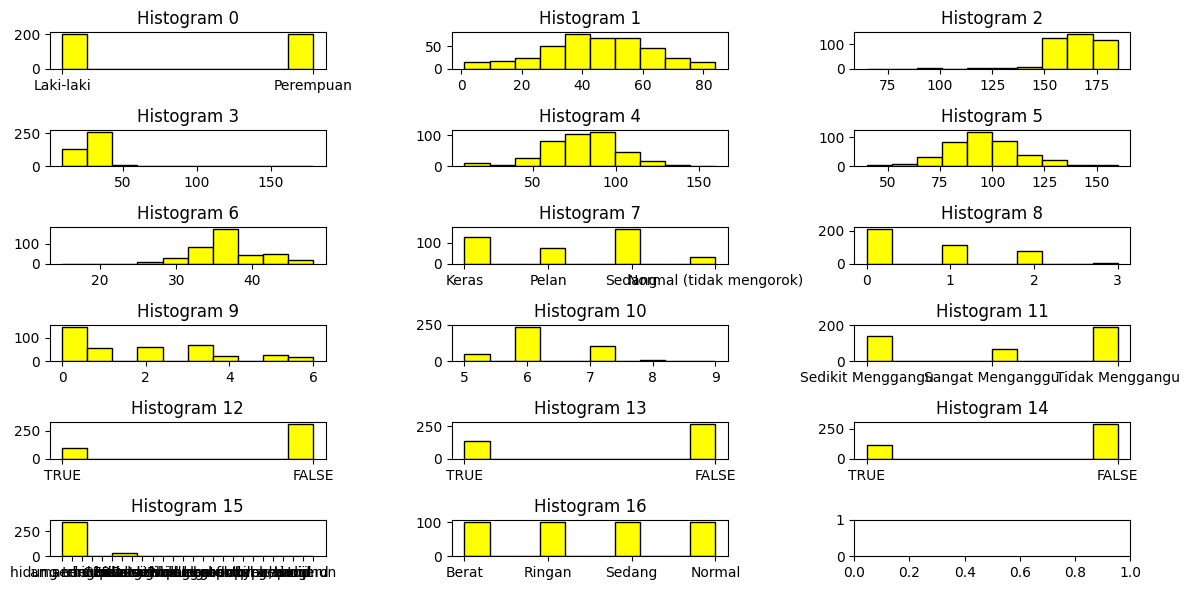

In [ ]:
import matplotlib.pyplot as plt

# Creating subplots with multiple histograms
fig, axes = plt.subplots(nrows=6, ncols=3, figsize=(12, 6))

for i, column in enumerate(df):

  axes.flat[i].hist(df[column], color='Yellow', edgecolor='black')
  axes.flat[i].set_title(f'Histogram {i}')


# Adjusting layout for better spacing
plt.tight_layout()

# Display the figure
plt.show()

In [ ]:
df['Label (OSA)'].value_counts().values

array([102, 101, 100, 100])

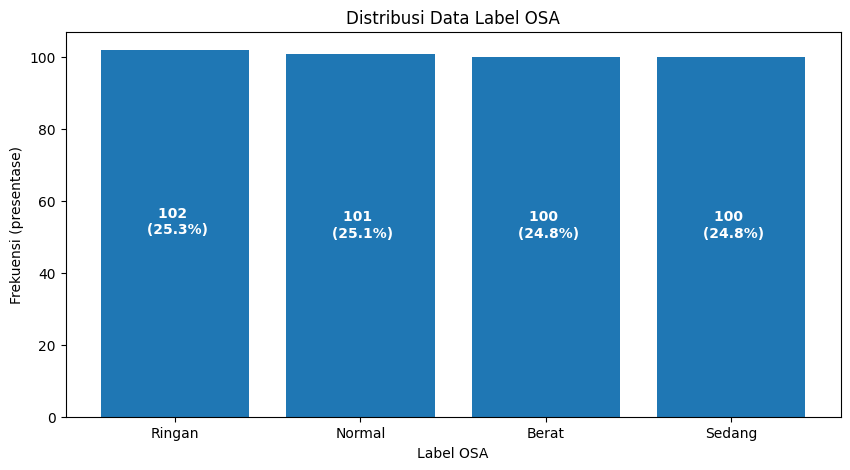

In [ ]:
# importing library
import matplotlib.pyplot as plt

# function to add value labels
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i]//2, f'{y[i]} \n ({(y[i]*100/sum(y)).round(1)}%)', ha = 'center', color='white', weight='bold')

if __name__ == '__main__':

    # creating data on which bar chart will be plot
    x = df['Label (OSA)'].value_counts().index

    y = df['Label (OSA)'].value_counts().values

    # setting figure size by using figure() function
    plt.figure(figsize = (10,5))

    # making the bar chart on the data
    plt.bar(x, y)

    # calling the function to add value labels
    addlabels(x, y)

    # giving title to the plot
    plt.title("Distribusi Data Label OSA")

    # giving X and Y labels
    plt.xlabel("Label OSA")
    plt.ylabel("Frekuensi (presentase)")

    # visualizing the plot
    plt.show()

In [22]:
y_train.value_counts()

Normal    74
Ringan    69
Berat     69
Sedang    69
Name: Label (OSA), dtype: int64